# Run test on our own data , read in data and cleaning

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import sys

# change the following path to your local repository of energyanalytics
mod_path = '/Users/Simo/Documents/EquotaCode/Disaggregation/disaggregation/energyanalytics/source/disaggregation'
if not (mod_path in sys.path):
    sys.path.insert(0, mod_path)
    
from bayesian_cp_detect import bayesian_cp_3 as bcp
from bayesian_cp_detect import cp_detect
from bayesian_cp_detect.example import Dissagregation_functions as example

# make sure that the code is loaded to the lastest version
reload(bcp)

appliance_list = ['3014','3015','3016','3017','3018','3019','3036','3037','3038','3039','3040']
total_data = pd.DataFrame.from_csv('/Users/Simo/Desktop/equota/disagg/total.csv')

# resample total_data
total_data = total_data.resample('15T').pad()


In [2]:
import sys
sys.version
#sys.version_info

'2.7.10 (default, Jul 14 2015, 19:46:27) \n[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.39)]'

In [3]:
import numpy
numpy.__version__

'1.8.0rc1'

# Plot changepoints in a certain range

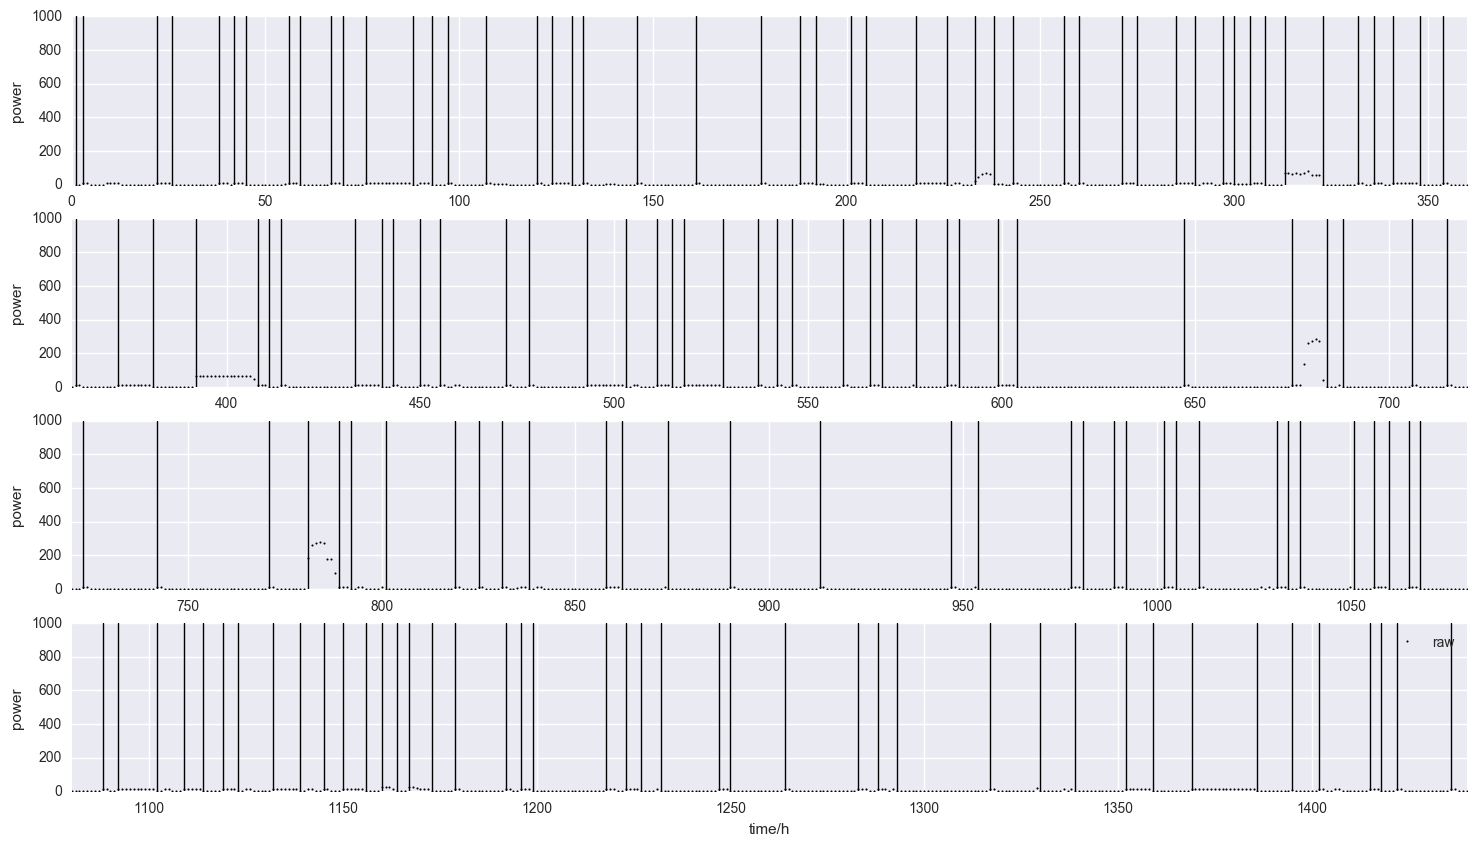

In [2]:
""" 
Explain: pick values from certian date range and run this cell to see the changepoints
"""
show_start_date = '2017-02-12'
show_end_date = '2017-02-27'


y = total_data.loc[show_start_date:show_end_date]['P'].values
t=np.array([i+1 for i in range(len(y))])

# Compute the changepoints
t_2, y_2 = bcp.rel_change_filter_0819_3(t,y)
mu_list_list, sigma_list_list, prob_r_list_list, r_list_list = cp_detect.bayesian_change_point_4(y_2, r_blur=30)
changepoint, changepoint_p = cp_detect.get_change_point(prob_r_list_list)
changepoint.append(len(t_2)-1)
example.plot_24h_data(t_2,y_2,changepoint)

# Using BCP and cluster to obtain the change shapes

In [ ]:
"""
Explain: Select a period of time and compute the clustering based on segments obtained by running the BCP algorithm
"""
start_date = '2017-01-11'
end_date = '2017-12-12'


y_all = total_data.loc[start_date:end_date].resample('15T').pad().values
t_all = [i for i in range(len(y_all))]
example.Computeandplotsegments(t_all = t_all,y_all = y_all, days = 200)

# Clustering from history data

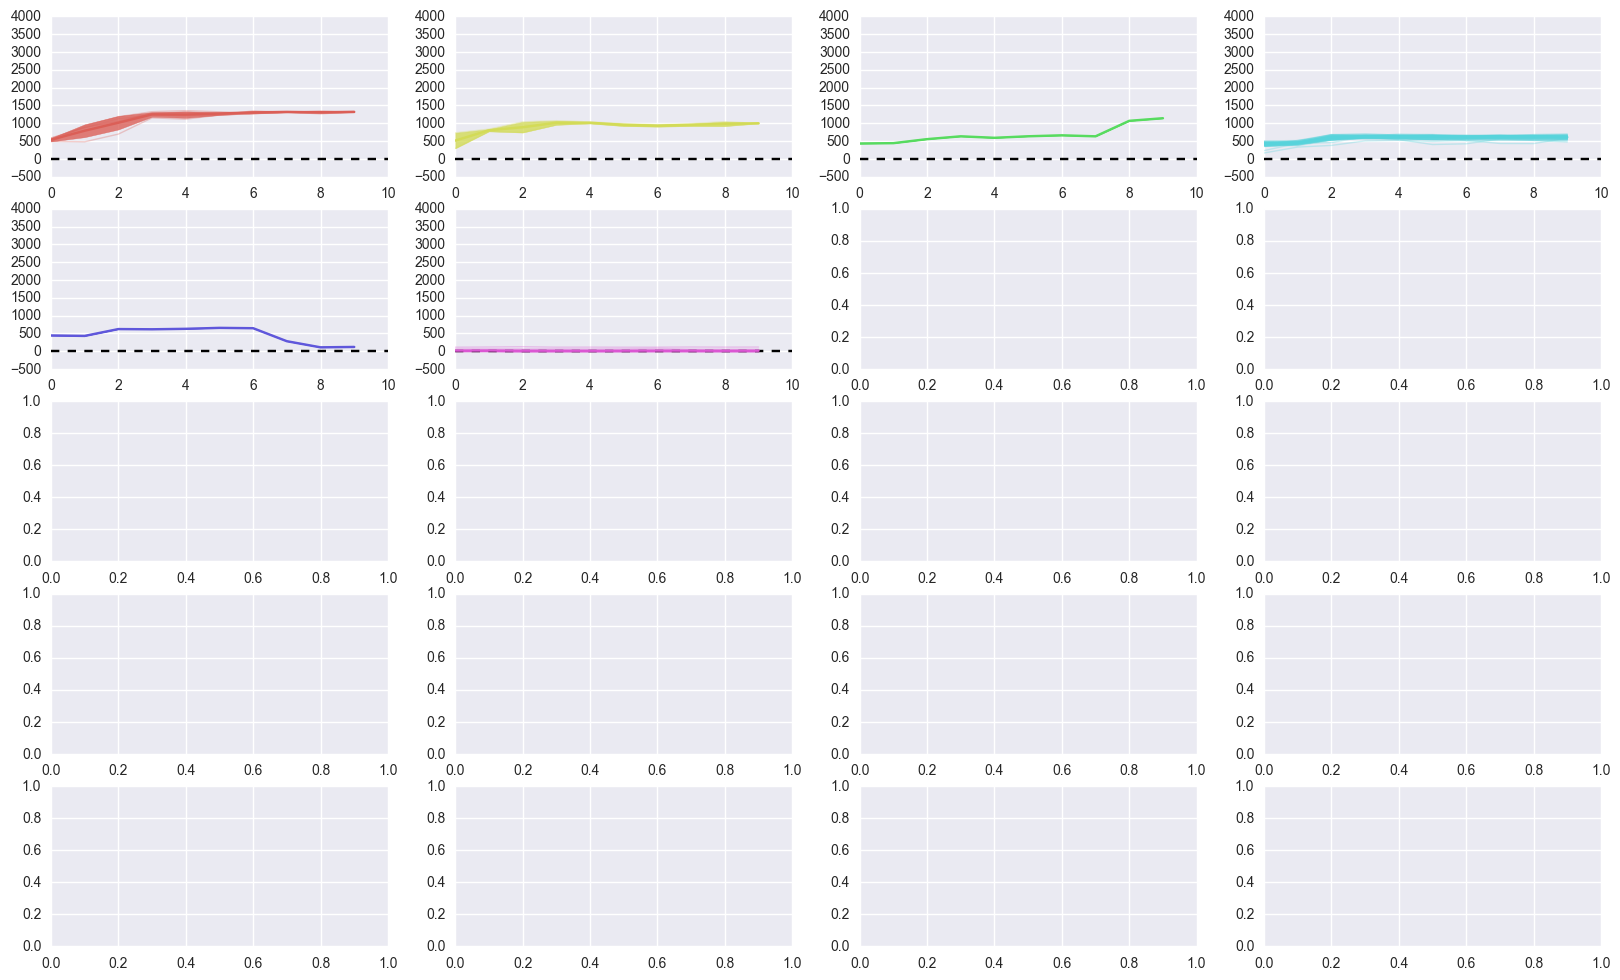

In [6]:
y_all = total_data.loc['2017-01-11':'2017-12-12'].resample('15T').pad().values
y_all = [x[0] for x in y_all]
cluster_mean,cluster_std,n_clusters,all_seg_per_cluster = example.integrated_clustering(t_all,y_all,num_of_days=200,period = 96,trim=10,min_n_clusters = 6, max_n_clusters=7)
example.plot_cluster_result(cluster_mean,cluster_std,n_clusters,all_seg_per_cluster)

# Dissagregation result for a certain day

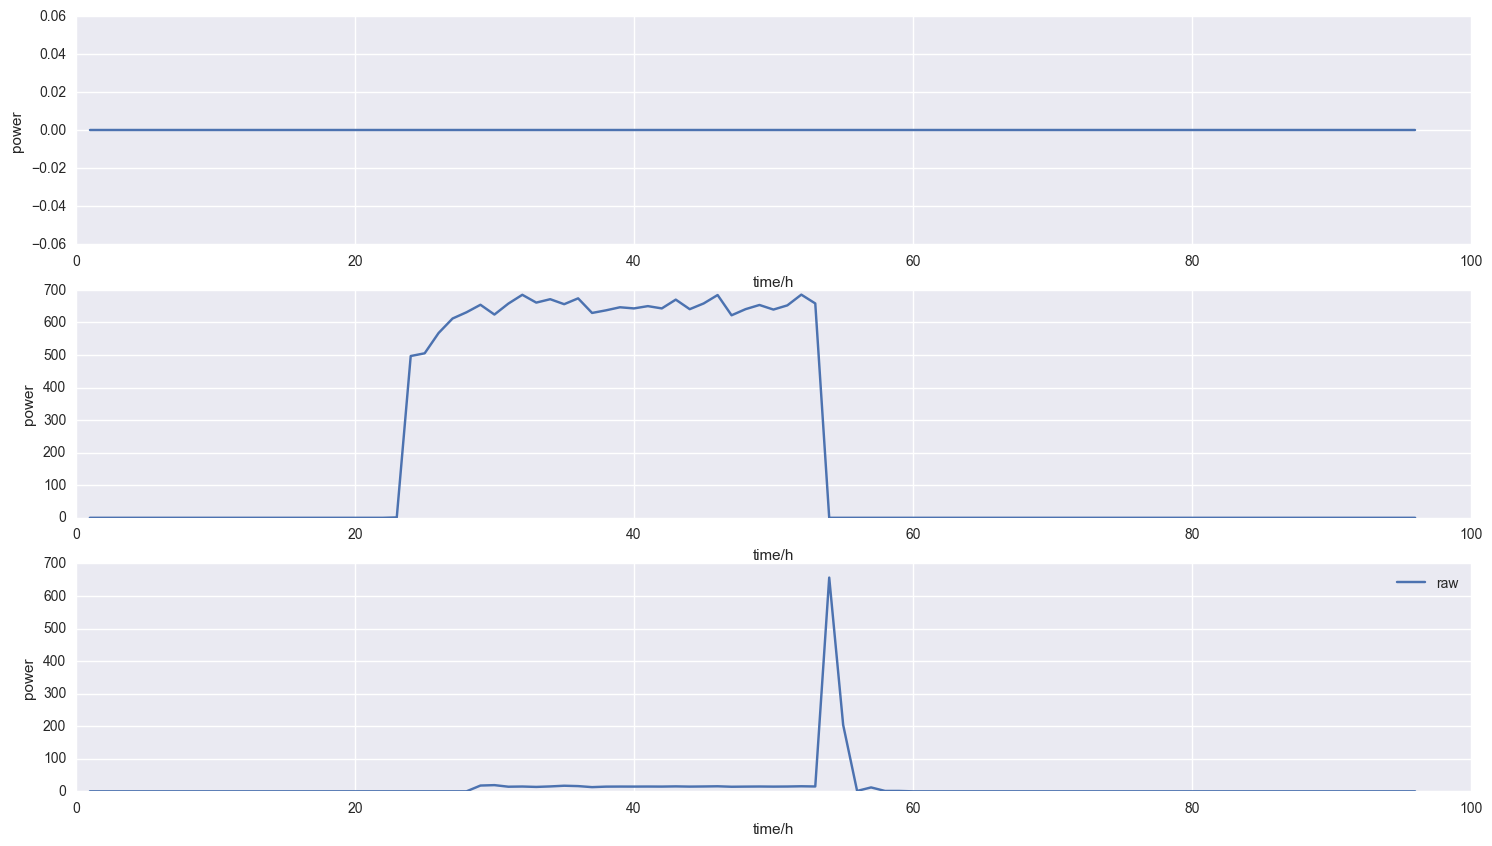

In [11]:
"""
pick your testing day here
"""

day = 103

cluster_mean_2 = []
cluster_mean_2.append(cluster_mean[0])
cluster_mean_2.append(cluster_mean[4])
cluster_mean_2.append(cluster_mean[5])


reload(bcp)
reload(example)
period = 96
import copy

# change the parameter day and make sure to construct the cluster_mean_2 before calling this function
predicted_profile = example.integrated_dissagregate(y_all,period,cluster_mean_2,day = day,n_equipment_type = len(cluster_mean_2),n_equipment=[2 for i in range(1,len(cluster_mean_2)+1)],obs_mat=example.n_dimension_identity_matrix(cluster_mean_2),power_usage = [i.mean() for i in cluster_mean_2])  
#print predicted_profile
fig, axes = plt.subplots(nrows=len(predicted_profile), figsize=[18, 10])
for ii, ax in enumerate(axes):
    ax.plot(np.array([i+1 for i in range(period)]),predicted_profile[ii], markersize=3, label='raw')
    ax.set_ylabel('power')
    ax.set_xlabel('time/h')
plt.legend()
#for i in range(len(predicted_profile)):
#    example.plot_dissagregation([predicted_profile[i]],np.array([i+1 for i in range(period)]))


# Compare to and plot the real data

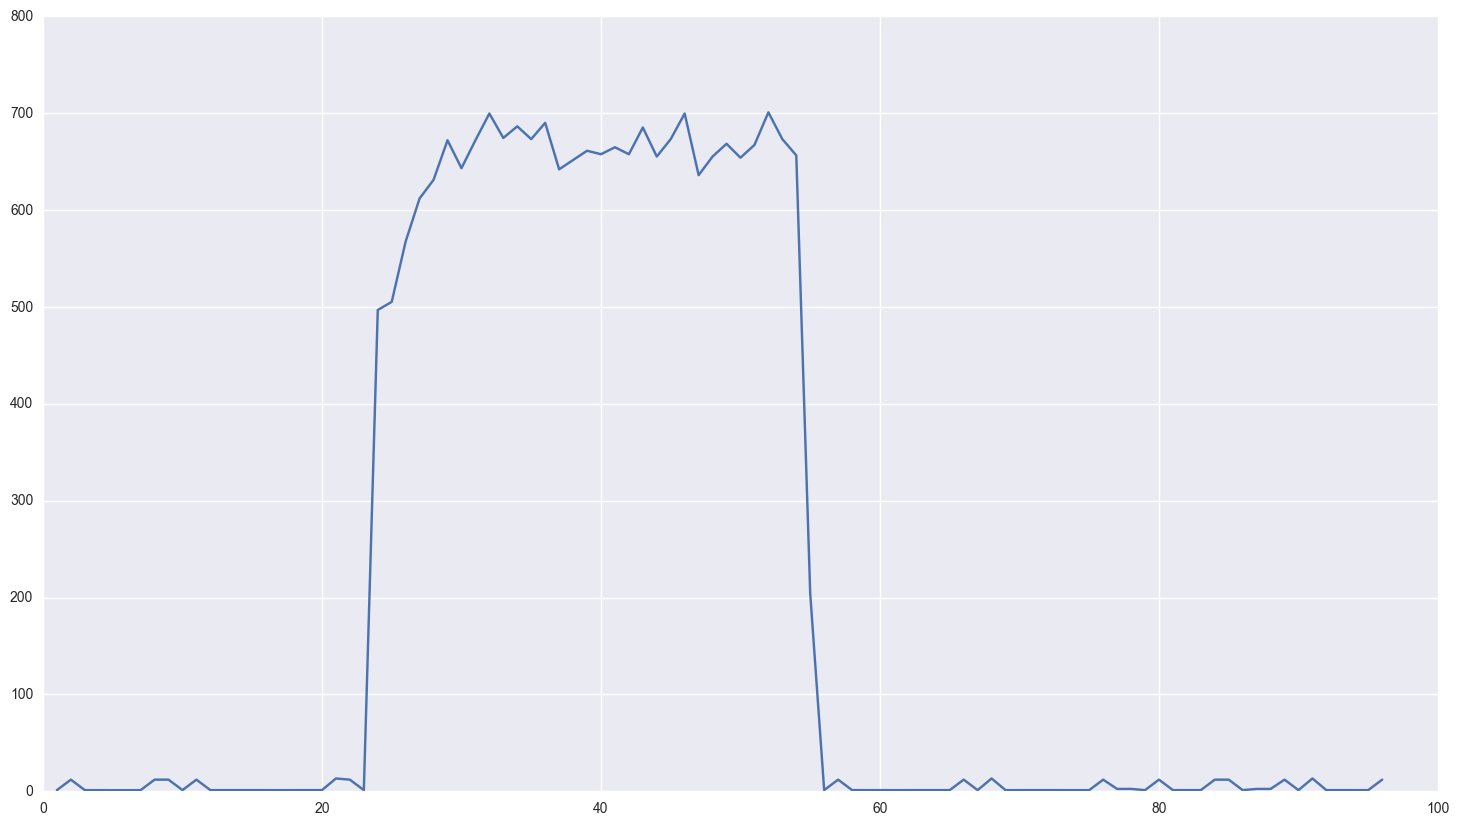

In [36]:
import datetime
def get_nth_day(total_data,n=99):
    return total_data[(datetime.datetime.strptime('2017-01-11','%Y-%m-%d')+datetime.timedelta(days = n)).strftime("%Y-%m-%d"):(datetime.datetime.strptime('2017-01-11','%Y-%m-%d')+datetime.timedelta(days = n)).strftime("%Y-%m-%d")].resample('15T').pad()

fig, axes = plt.subplots(figsize=[18, 10])
test = get_nth_day(total_data,n=day)
axes.plot(np.array([i+1 for i in range(period)]),test, markersize=3, label='raw')

# Plot the on/off status for each appliance

In [39]:
"""read in the data"""
data_list = ['3039_cooling_water_pump','3040_cooling_water_pump','3042_cooling_water_pump','4680_cooling_water_pump','3046_chiller','3047_chiller','3048_chiller','3053_chilled_water_pump','3054_chilled_water_pump','3055_chilled_water_pump','3056_chilled_water_pump']
data_list_cooling_water_pump = ['3039_cooling_water_pump','3040_cooling_water_pump','3042_cooling_water_pump','4680_cooling_water_pump']
data_list_chiller = ['3046_chiller','3047_chiller','3048_chiller']
data_list_chilled_water_pump=['3053_chilled_water_pump','3054_chilled_water_pump','3055_chilled_water_pump','3056_chilled_water_pump']
data_dict = {}
for name in data_list:
    data_dict[name] = pd.DataFrame.from_csv('/Users/Simo/Desktop/equota/disagg/'+name+'.csv')


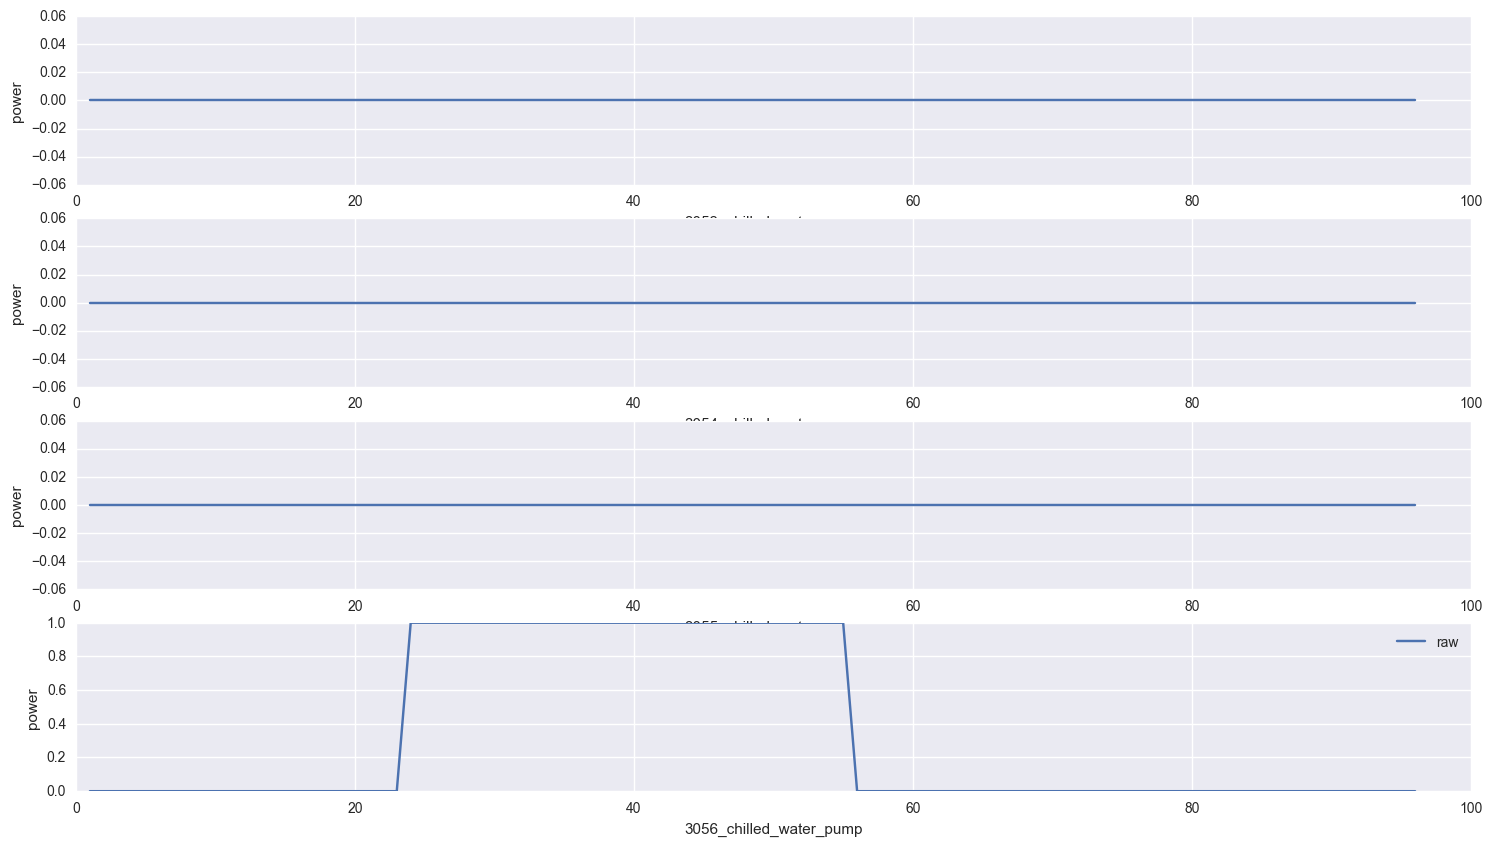

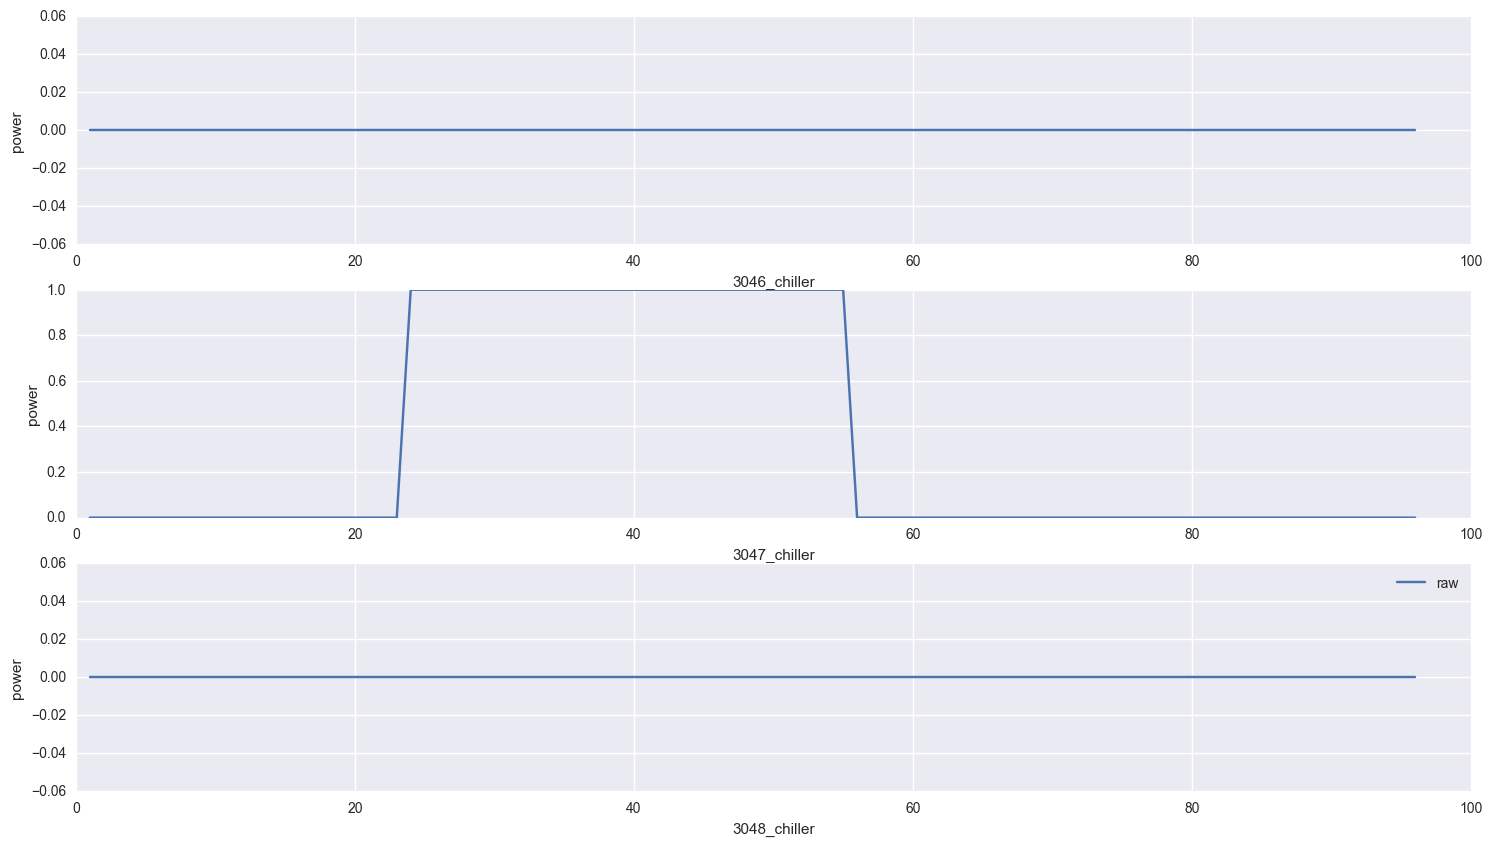

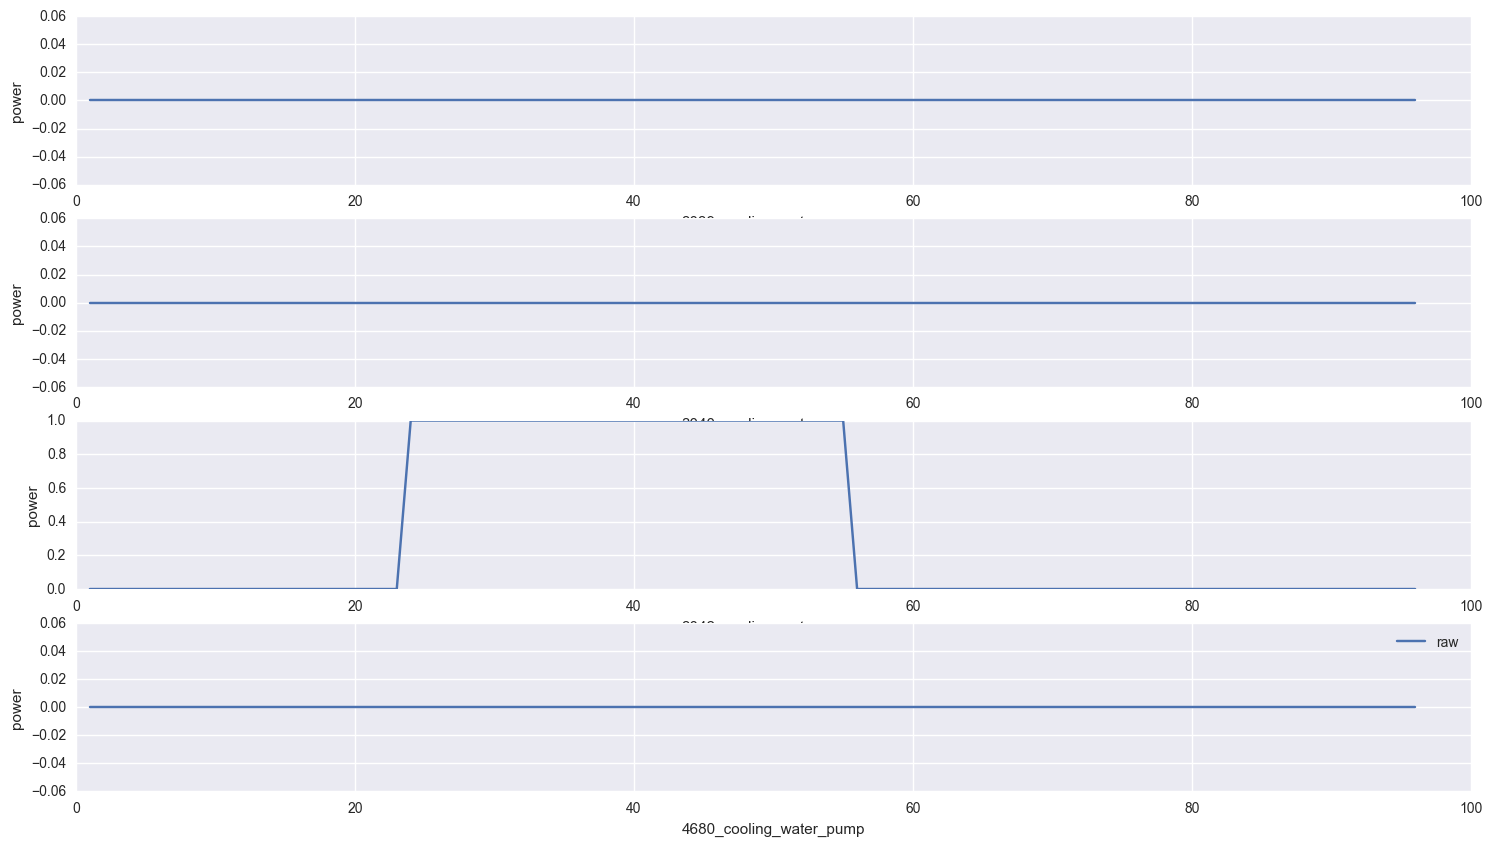

In [40]:
def get_nth_day_separate_data(data_list = data_list,data_dict= data_dict,n = 99):
    fig, axes = plt.subplots(nrows=len(data_list), figsize=[18, 10])
    start = (datetime.datetime.strptime('2017-01-11','%Y-%m-%d')+datetime.timedelta(days = n)).strftime("%Y-%m-%d")
    end = (datetime.datetime.strptime('2017-01-11','%Y-%m-%d')+datetime.timedelta(days = n)).strftime("%Y-%m-%d")
    
    
    for ii, ax in enumerate(axes):
        ax.plot(np.array([i+1 for i in range(period)]),data_dict[data_list[ii]].loc[start:end].resample('15T').pad(), markersize=3, label='raw')
        ax.set_ylabel('power')
        ax.set_xlabel(data_list[ii])
    plt.legend()
    #for name in data_list:
    #    data_dict[name].loc[start:end].plot()

#get_nth_day_separate_data(n=day)
get_nth_day_separate_data(data_list = data_list_chilled_water_pump,n = day)
get_nth_day_separate_data(data_list = data_list_chiller,n = day)
get_nth_day_separate_data(data_list = data_list_cooling_water_pump,n = day)